In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [6]:
df.duplicated().any()

np.False_

In [7]:
e=df['embarked'].mode()[0]
df['embarked']=df['embarked'].fillna(e)

<Axes: xlabel='fare'>

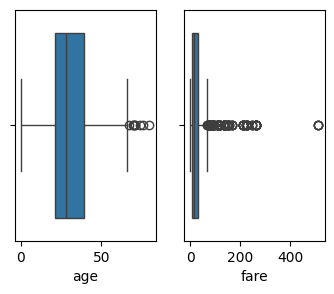

In [8]:
fig,axes=plt.subplots(1,2, figsize=(4,3))

sns.boxplot(df,x='age',ax=axes[0])
sns.boxplot(df,x='fare',ax=axes[1])

In [9]:
a=df['age'].median()
f=df['fare'].median()
df['age']=df['age'].fillna(a)
df['fare']=df['fare'].fillna(f)

In [10]:
df=df.drop(columns=['cabin'])

In [11]:
for col in ['age', 'fare']:
    df[col] = df[col].round(2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [13]:
df['family_count']=df['sibsp'] + df['parch']

In [14]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'survived', 'family_count'],
      dtype='object')

In [15]:
df=df.drop(columns=['sibsp', 'parch'])

In [16]:
# for i in ['title','f_name','l_name']:
#     df[i]=df[i].str.strip()

In [17]:
# for i in ['title','f_name','l_name']:
#     df[i]=df[i].str.strip()

df[['l_name','temp']]=df['name'].str.split(',', expand=True)
df[['title','f_name']]=df['temp'].str.split('.',n=1, expand=True)


In [18]:
df['f_name'].str.strip()
df.loc[30:45:1]

,pclass,name,sex,age,ticket,fare,embarked,survived,family_count,l_name,temp,title,f_name
30,1,"Blackwell, Mr. Stephen Weart",male,45.0,113784,35.50,S,0,0,Blackwell,Mr. Stephen Weart,Mr,Stephen Weart
31,1,"Blank, Mr. Henry",male,40.0,112277,31.00,C,1,0,Blank,Mr. Henry,Mr,Henry
32,1,"Bonnell, Miss. Caroline",female,30.0,36928,164.87,S,1,0,Bonnell,Miss. Caroline,Miss,Caroline
33,1,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.55,S,1,0,Bonnell,Miss. Elizabeth,Miss,Elizabeth
34,1,"Borebank, Mr. John James",male,42.0,110489,26.55,S,0,0,Borebank,Mr. John James,Mr,John James
35,1,"Bowen, Miss. Grace Scott",female,45.0,PC 17608,262.38,C,1,0,Bowen,Miss. Grace Scott,Miss,Grace Scott
36,1,"Bowerman, Miss. Elsie Edith",female,22.0,113505,55.00,S,1,1,Bowerman,Miss. Elsie Edith,Miss,Elsie Edith
37,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,28.0,111427,26.55,S,1,0,Bradley,"Mr. George (""George Arthur Brayton"")",Mr,"George (""George Arthur Brayton"")"
38,1,"Brady, Mr. John Bertram",male,41.0,113054,30.50,S,0,0,Brady,Mr. John Bertram,Mr,John Bertram
39,1,"Brandeis, Mr. Emil",male,48.0,PC 17591,50.50,C,0,0,Brandeis,Mr. Emil,Mr,Emil


In [19]:
df=df.drop(columns=['name', 'temp'])

In [20]:
df=df.rename(columns={'sex':'gender'})

In [21]:
df['embarked']=df['embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df

,pclass,gender,age,ticket,fare,embarked,survived,family_count,l_name,title,f_name
0,1,female,29.00,24160,211.34,Southampton,1,0,Allen,Miss,Elisabeth Walton
1,1,male,0.92,113781,151.55,Southampton,1,3,Allison,Master,Hudson Trevor
2,1,female,2.00,113781,151.55,Southampton,0,3,Allison,Miss,Helen Loraine
3,1,male,30.00,113781,151.55,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.00,113781,151.55,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.50,2665,14.45,Cherbourg,0,1,Zabour,Miss,Hileni
1305,3,female,28.00,2665,14.45,Cherbourg,0,1,Zabour,Miss,Thamine
1306,3,male,26.50,2656,7.22,Cherbourg,0,0,Zakarian,Mr,Mapriededer
1307,3,male,27.00,2670,7.22,Cherbourg,0,0,Zakarian,Mr,Ortin


In [22]:
g=df['ticket'].value_counts()
g==1
g[g==1]
solo_tickets=g[g==1].index

def f1(d):
    if d['family_count']>0:
        return 'family'
    else:
        if d['ticket']in(solo_tickets):
            return 'solo'
        else:
            return 'friends'

df['companion_type']=df.apply(f1,axis=1)

df

,pclass,gender,age,ticket,fare,embarked,survived,family_count,l_name,title,f_name,companion_type
0,1,female,29.00,24160,211.34,Southampton,1,0,Allen,Miss,Elisabeth Walton,friends
1,1,male,0.92,113781,151.55,Southampton,1,3,Allison,Master,Hudson Trevor,family
2,1,female,2.00,113781,151.55,Southampton,0,3,Allison,Miss,Helen Loraine,family
3,1,male,30.00,113781,151.55,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton,family
4,1,female,25.00,113781,151.55,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),family
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.50,2665,14.45,Cherbourg,0,1,Zabour,Miss,Hileni,family
1305,3,female,28.00,2665,14.45,Cherbourg,0,1,Zabour,Miss,Thamine,family
1306,3,male,26.50,2656,7.22,Cherbourg,0,0,Zakarian,Mr,Mapriededer,solo
1307,3,male,27.00,2670,7.22,Cherbourg,0,0,Zakarian,Mr,Ortin,solo


In [23]:
lst=['ticket','title','f_name','l_name','gender', 'age','companion_type','family_count','pclass','embarked','fare','survived']
df=df[lst]
df

,ticket,title,f_name,l_name,gender,age,companion_type,family_count,pclass,embarked,fare,survived
0,24160,Miss,Elisabeth Walton,Allen,female,29.00,friends,0,1,Southampton,211.34,1
1,113781,Master,Hudson Trevor,Allison,male,0.92,family,3,1,Southampton,151.55,1
2,113781,Miss,Helen Loraine,Allison,female,2.00,family,3,1,Southampton,151.55,0
3,113781,Mr,Hudson Joshua Creighton,Allison,male,30.00,family,3,1,Southampton,151.55,0
4,113781,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.00,family,3,1,Southampton,151.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2665,Miss,Hileni,Zabour,female,14.50,family,1,3,Cherbourg,14.45,0
1305,2665,Miss,Thamine,Zabour,female,28.00,family,1,3,Cherbourg,14.45,0
1306,2656,Mr,Mapriededer,Zakarian,male,26.50,solo,0,3,Cherbourg,7.22,0
1307,2670,Mr,Ortin,Zakarian,male,27.00,solo,0,3,Cherbourg,7.22,0


In [24]:
df=df.sort_values(by='ticket',ascending=True)
df=df.reset_index(drop=True)
df

,ticket,title,f_name,l_name,gender,age,companion_type,family_count,pclass,embarked,fare,survived
0,110152,Miss,Gladys,Cherry,female,30.0,friends,0,1,Southampton,86.50,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,female,33.0,friends,0,1,Southampton,86.50,1
2,110152,Miss,Roberta,Maioni,female,16.0,friends,0,1,Southampton,86.50,1
3,110413,Miss,Ruth,Taussig,female,18.0,family,2,1,Southampton,79.65,1
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,female,39.0,family,2,1,Southampton,79.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,female,47.0,family,1,1,Southampton,61.18,1
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,male,46.0,family,1,1,Southampton,61.18,0
1306,W/C 14208,Mr,Walter,Harris,male,30.0,solo,0,2,Southampton,10.50,0
1307,WE/P 5735,Capt,Edward Gifford,Crosby,male,70.0,family,2,1,Southampton,71.00,0


In [25]:
df['age_category'] = pd.cut(df['age'],bins=[0,15,25,60,81],labels=['children','teen','adult','senior'])

# level-1

1. get the unique values for (gender,pclass,age_category,companion_type,embarked)

In [26]:
for col in ['gender','pclass','age_category','companion_type','embarked']:
    print(df[col].unique())

['female' 'male']
[1 2 3]
['adult', 'teen', 'senior', 'children']
Categories (4, object): ['children' < 'teen' < 'adult' < 'senior']
['friends' 'family' 'solo']
['Southampton' 'Cherbourg' 'Queenstown']


2. (i)  get the passenger 'Emil' details
   (ii) get the passenger 'Emil' gender,age,companion_type,survival_status

In [27]:
df.query("f_name=='Emil'")

,ticket,title,f_name,l_name,gender,age,companion_type,family_count,pclass,embarked,fare,survived,age_category


3. get the 'Emil' family members

4. get the passenger details who got survived

In [28]:
df.query("survived==1")

,ticket,title,f_name,l_name,gender,age,companion_type,family_count,pclass,embarked,fare,survived,age_category
0,110152,Miss,Gladys,Cherry,female,30.0,friends,0,1,Southampton,86.50,1,adult
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,female,33.0,friends,0,1,Southampton,86.50,1,adult
2,110152,Miss,Roberta,Maioni,female,16.0,friends,0,1,Southampton,86.50,1,teen
3,110413,Miss,Ruth,Taussig,female,18.0,family,2,1,Southampton,79.65,1,teen
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,female,39.0,family,2,1,Southampton,79.65,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,W./C. 14258,Miss,Lucy,Ridsdale,female,50.0,solo,0,2,Southampton,10.50,1,adult
1291,W./C. 14260,Mr,Percy Thomas,Oxenham,male,22.0,solo,0,2,Southampton,10.50,1,teen
1293,W./C. 14266,Mrs,(Selena Rogers),Cook,female,22.0,solo,0,2,Southampton,10.50,1,teen
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,female,47.0,family,1,1,Southampton,61.18,1,adult


5. get the passenger name,age_category,gender who din't get survive

In [29]:
df.query("survived==0") [['f_name','l_name','age_category','gender']]

,f_name,l_name,age_category,gender
5,Emil,Taussig,adult,male
6,Walter Chamberlain,Porter,adult,male
7,George Quincy,Clifford,adult,male
8,John Edward,Maguire,adult,male
9,John James,Borebank,adult,male
...,...,...,...,...
1302,Edward Watson,Ford,teen,male
1303,Alice Phoebe,Harknett,adult,female
1305,Herbert Fuller,Chaffee,adult,male
1306,Walter,Harris,adult,male


6. get the top 10 male passengers name in descending order of age


In [30]:
df.query('gender=="male"')[['gender','f_name','age']].sort_values(by='age',ascending=False).head(10)

,gender,f_name,age
444,male,Algernon Henry Wilson,80.0
617,male,Johan,74.0
1157,male,Ramon,71.0
1163,male,George B,71.0
867,male,Patrick,70.5
1307,male,Edward Gifford,70.0
1015,male,Henry Michael,70.0
1105,male,Isidor,67.0
1014,male,Edward H,66.0
573,male,Frank,65.0


7. find the average age of passengers

In [31]:
df['age'].mean()

np.float64(29.50318563789152)

8. find the average age of female passengers


In [32]:
df.query("gender=='female'")['age'].mean()

np.float64(28.57208154506438)

9. find the survival  rate of passengers

In [92]:
# Overall survival rate
survival_rate = df['survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")

Overall Survival Rate: 38.20%


10. find the survival  rate of female passengers


In [93]:
# Survival rate of female passengers
female_survival_rate = df[df['gender'] == 'female']['survived'].mean()
print(f"Survival Rate of Female Passengers: {female_survival_rate:.2%}")


Survival Rate of Female Passengers: 72.75%


11. find the survival  rate of male passengers


In [94]:
# Survival rate of male passengers
male_survival_rate = df[df['gender'] == 'male']['survived'].mean()
print(f"Survival Rate of Male Passengers: {male_survival_rate:.2%}")


Survival Rate of Male Passengers: 19.10%


12. get highest and lowest age of passengers

In [33]:
df['age'].max()     #np.float64(80.0)
df['age'].min()     #np.float64(0.17)

#or

df.agg({'age' : ['max','min']})

,age
max,80.00
min,0.17


13. get the highest and lowest fare amount

In [34]:
df.agg({'fare' : ['max','min']})

,fare
max,512.33
min,0.00


14. get the male passengers average fare 

In [35]:
df.query("gender=='male'")['fare'].mean()

np.float64(26.140901542111504)

15. get the female passengers average fare 


In [36]:
df.query("gender=='female'")['fare'].mean()

np.float64(46.198197424892705)

16. how many solo travellers are travelling

In [37]:
df.query("companion_type=='solo'").shape[0]

663

17. how many  travellers are travelling with friends

In [38]:
df.query("companion_type=='friends'").shape[0]

127

18. how many  travellers are travelling with family


In [39]:
df.query("companion_type=='family'").shape[0]

519

19. get the count of passengers name,gender,age,pclass who are paying highest fare amount

In [40]:
h=df.loc[df['fare']==df['fare'].max()][['f_name','gender','age','pclass']].count()
h

f_name    4
gender    4
age       4
pclass    4
dtype: int64

20. get the count of passengers name,gender,age,pclass who are paying lowest fare amount


In [41]:
df.loc[df['fare']==df['fare'].min()][['f_name','gender','age','pclass']].count()


f_name    17
gender    17
age       17
pclass    17
dtype: int64

# level-2

1. get the count of travellers

In [42]:
df['ticket'].count()

np.int64(1309)

2. get the count of survival and non-survival count

In [43]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

3. get the count of travellers in each gender

In [44]:
df['gender'].value_counts()

gender
male      843
female    466
Name: count, dtype: int64

4. get the count of survival and non-survival count in each gender

In [45]:
df.groupby(['gender'])['survived'].value_counts()

gender  survived
female  1           339
        0           127
male    0           682
        1           161
Name: count, dtype: int64

5. get the count of travellers in each embarked

In [46]:
df['embarked'].value_counts()

embarked
Southampton    916
Cherbourg      270
Queenstown     123
Name: count, dtype: int64

6. get the count of survival and non-survival count in each embarked


In [47]:
df.groupby(['embarked'])['survived'].value_counts()

embarked     survived
Cherbourg    1           150
             0           120
Queenstown   0            79
             1            44
Southampton  0           610
             1           306
Name: count, dtype: int64

7. get the count of travellers in each age_category


In [48]:
df['age_category'].value_counts()

age_category
adult       833
teen        328
children    115
senior       33
Name: count, dtype: int64

8. get the count of survival and non-survival count in each age_category

In [49]:
df.groupby(['age_category'])['survived'].value_counts()

C:\Users\balaj\AppData\Local\Temp\ipykernel_23892\1746203050.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_category'])['survived'].value_counts()


age_category  survived
children      1            66
              0            49
teen          0           206
              1           122
adult         0           529
              1           304
senior        0            25
              1             8
Name: count, dtype: int64

9. get the count of travellers in each companion_type


In [50]:
df['companion_type'].value_counts()

companion_type
solo       663
family     519
friends    127
Name: count, dtype: int64

10. get the count of survival and non-survival count in each companion_type


In [51]:
df.groupby(['companion_type'])['survived'].value_counts()

companion_type  survived
family          1           261
                0           258
friends         0            67
                1            60
solo            0           484
                1           179
Name: count, dtype: int64

11. get the count of pclass


In [52]:
df['pclass'].count()

np.int64(1309)

12. get the count of survival and non-survival count in each pclass

In [53]:
df.groupby(['pclass'])['survived'].value_counts()

pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: count, dtype: int64

13. get the co-relation for all numerical columns

In [54]:
df.corr(numeric_only=True)

,age,family_count,pclass,fare,survived
age,1.000000,-0.193742,-0.377908,0.178180,-0.043817
family_count,-0.193742,1.000000,0.050027,0.226613,0.026876
pclass,-0.377908,0.050027,1.000000,-0.558681,-0.312469
fare,0.178180,0.226613,-0.558681,1.000000,0.244414
survived,-0.043817,0.026876,-0.312469,0.244414,1.000000


# Level-3

1. plot the female and male count

<Axes: xlabel='gender', ylabel='count'>

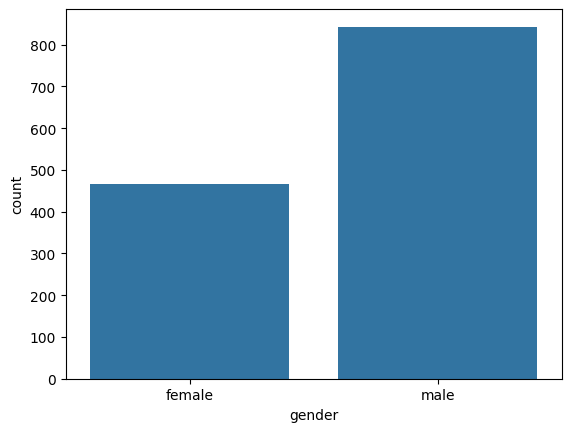

In [55]:
sns.countplot(df,x='gender')

2. plot the female and male count in each pclass

<Axes: xlabel='gender', ylabel='count'>

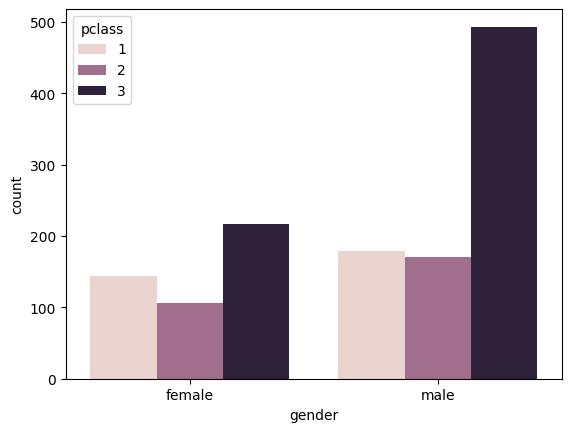

In [56]:
sns.countplot(df,x='gender', hue='pclass')

2. plot the female and male count in each survival_status

<Axes: xlabel='gender', ylabel='count'>

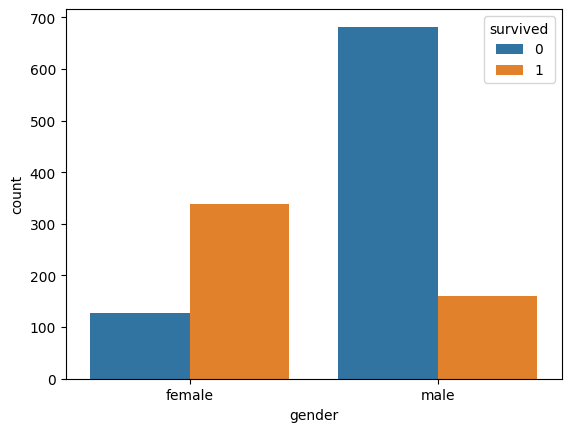

In [57]:
sns.countplot(df,x='gender', hue='survived')

1. plot the companion_type count

<Axes: xlabel='companion_type', ylabel='count'>

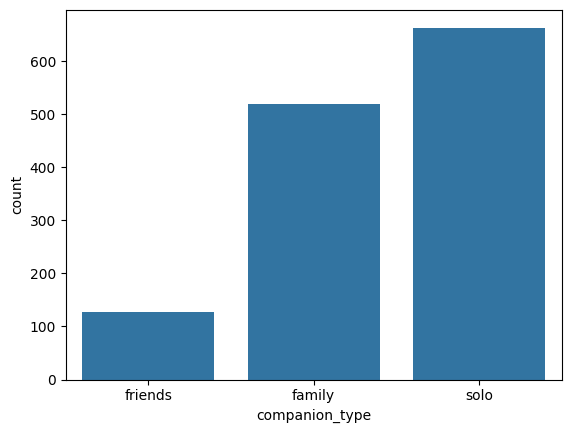

In [58]:
sns.countplot(df,x='companion_type')

1. plot the companion_type count in each gender

<Axes: xlabel='companion_type', ylabel='count'>

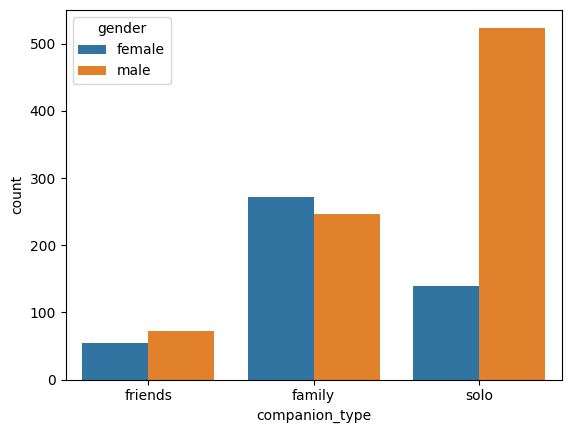

In [59]:
sns.countplot(df,x='companion_type',hue='gender')

1. plot the companion_type count in each pclass

<Axes: xlabel='companion_type', ylabel='count'>

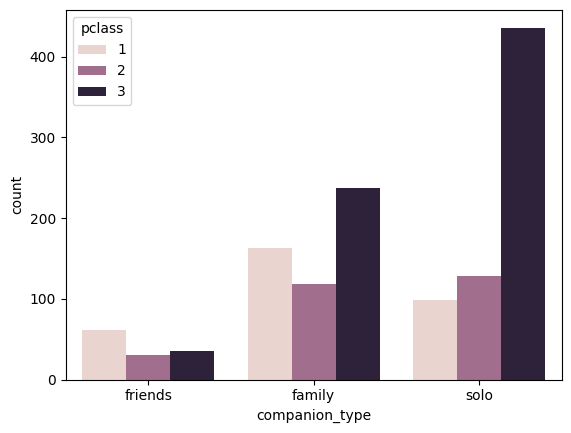

In [60]:
sns.countplot(df,x='companion_type',hue='pclass')

1. plot the companion_type count in each survival_status

<Axes: xlabel='companion_type', ylabel='count'>

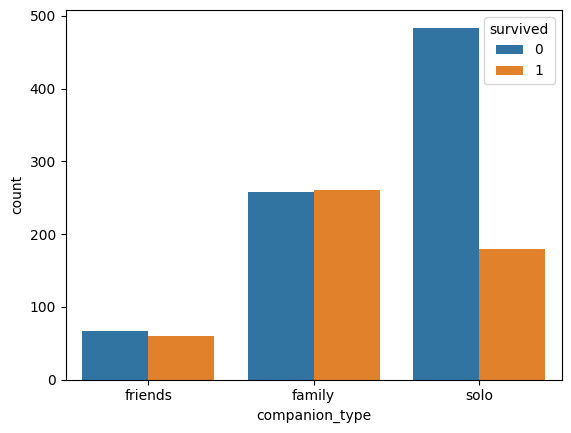

In [61]:
sns.countplot(df,x='companion_type',hue='survived')

1. plot the age_category count in each gender


<Axes: xlabel='age_category', ylabel='count'>

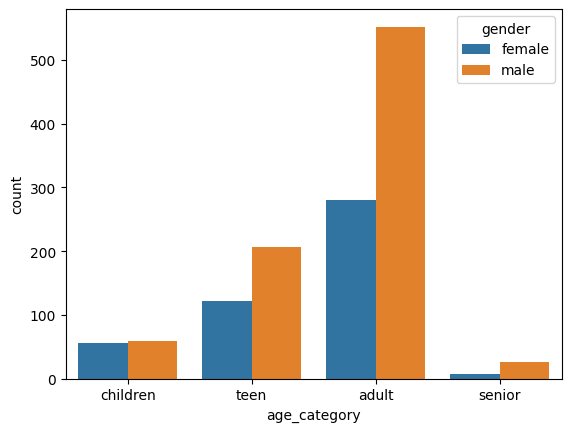

In [62]:
sns.countplot(df,x='age_category',hue='gender')

1. plot the age_category count in each pclass

<Axes: xlabel='age_category', ylabel='count'>

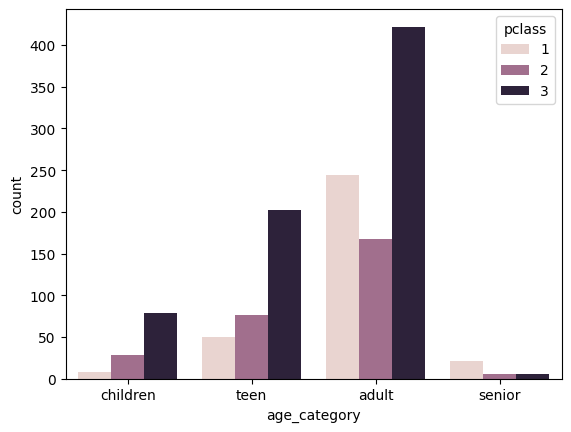

In [63]:
sns.countplot(df,x='age_category',hue='pclass')

1. plot the age_category count in each survival_status


<Axes: xlabel='age_category', ylabel='count'>

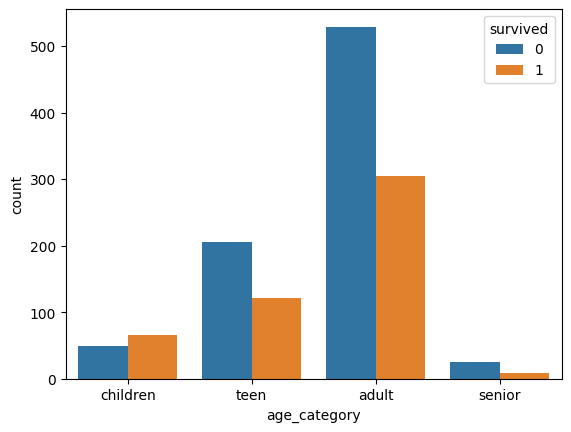

In [64]:
sns.countplot(df,x='age_category',hue='survived')

1. plot the embarked count in each gender

<Axes: xlabel='embarked', ylabel='count'>

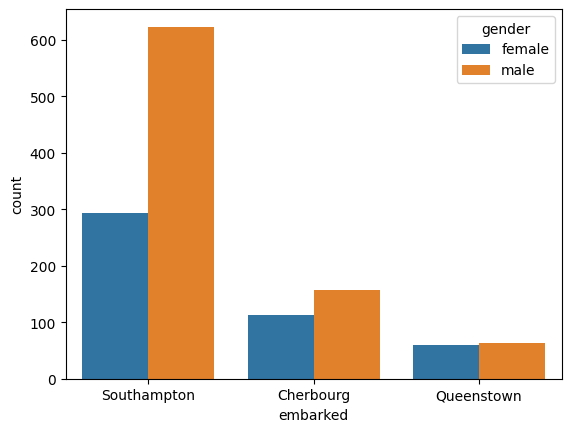

In [65]:
sns.countplot(df,x='embarked',hue='gender')

1. plot the embarked count in each survival_status


<Axes: xlabel='embarked', ylabel='count'>

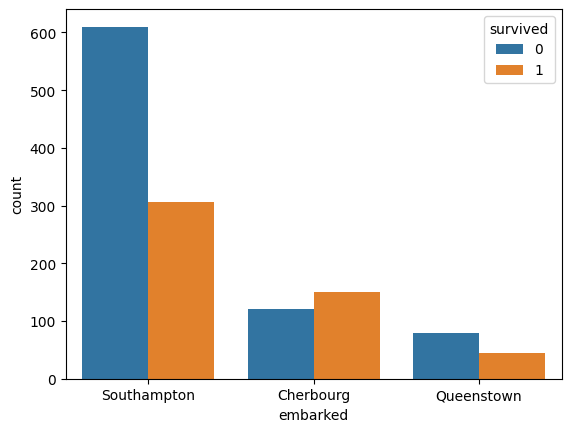

In [66]:
sns.countplot(df,x='embarked',hue='survived')

1. plot the embarked count in each pclass

<Axes: xlabel='embarked', ylabel='count'>

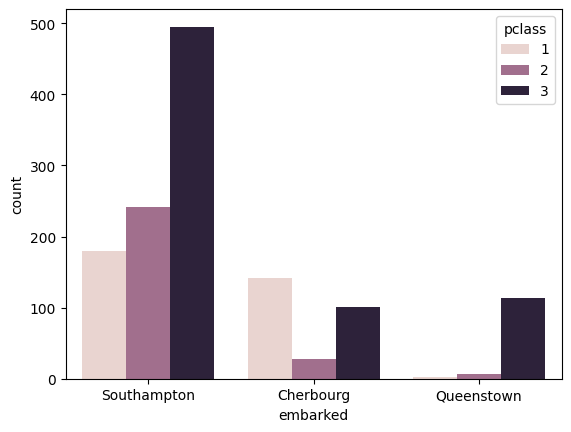

In [67]:
sns.countplot(df,x='embarked',hue='pclass')

2. plot the distribution of fare

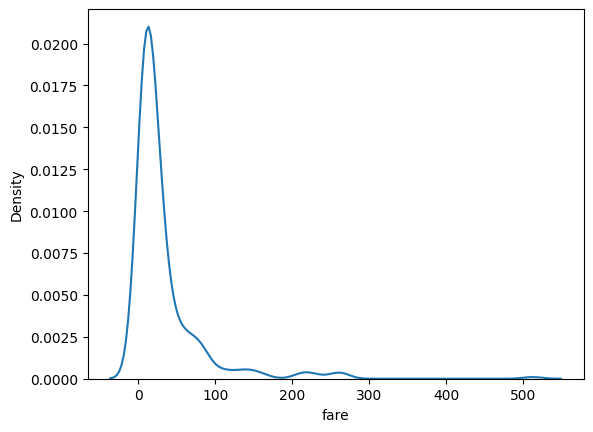

In [68]:
plt.Figure(figsize=(4,2))
sns.kdeplot(df['fare'])
plt.show()

3. plot the distribution of age

<Axes: xlabel='age', ylabel='Density'>

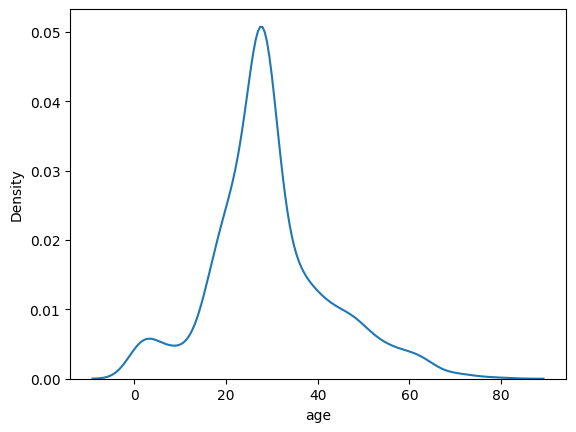

In [69]:
sns.kdeplot(df['age'])

4. plot the percentage of passengers in each pclass

In [70]:
p=df['pclass'].value_counts()
p.values
p.index

Index([3, 1, 2], dtype='int64', name='pclass')

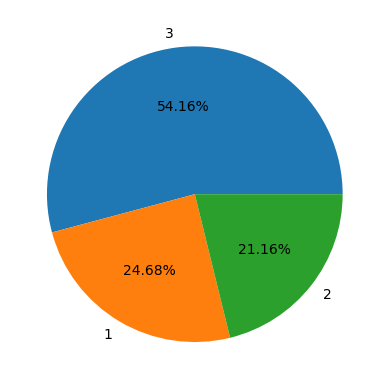

In [71]:
plt.Figure(figsize=(4,2))
plt.pie(x=p.values,labels=p.index,autopct='%.2f%%')
plt.show()

4. plot the percentage of passengers in each age_category

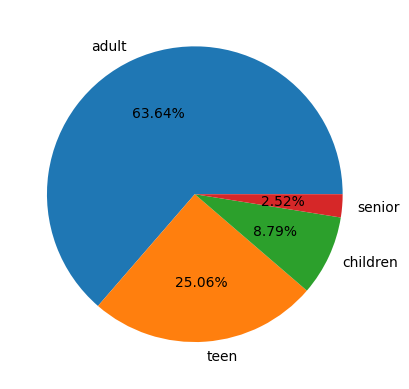

In [72]:
a=df['age_category'].value_counts()
a.values
a.index

plt.Figure(figsize=(4,2))
plt.pie(x=a.values,labels=a.index,autopct='%.2f%%')
plt.show()

plot the spread of data in age_column wrt fare_column

Text(0.5, 1.0, 'Age vs Fare')

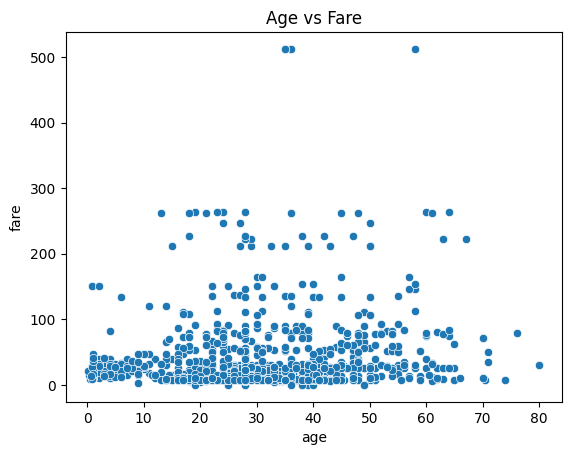

In [80]:
sns.scatterplot(df,x='age',y='fare')
plt.title('Age vs Fare')

plot the trend of age wrt fare

Text(0.5, 1.0, 'Age vs Fare with Regression Line')

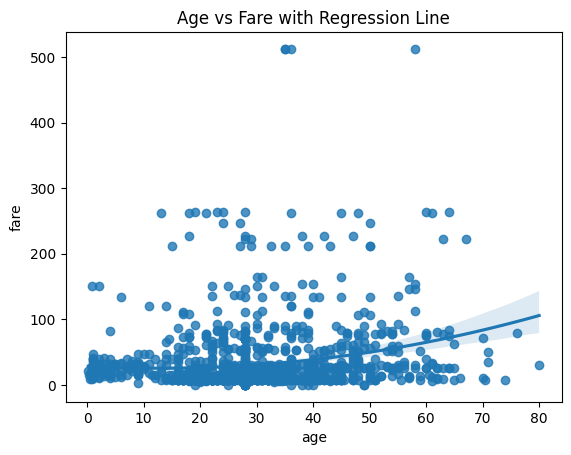

In [81]:
sns.regplot(df,x='age',y='fare',order=2)
plt.title('Age vs Fare with Regression Line')

plot the trend of fare wrt pclass

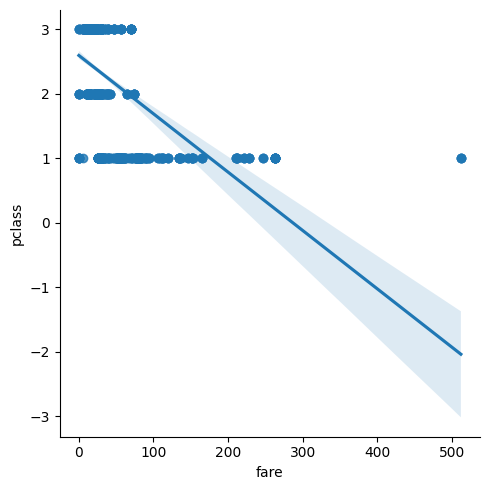

In [84]:
sns.lmplot(df,x='fare',y='pclass')

find the outlier in fare,age

<Axes: xlabel='fare', ylabel='age'>

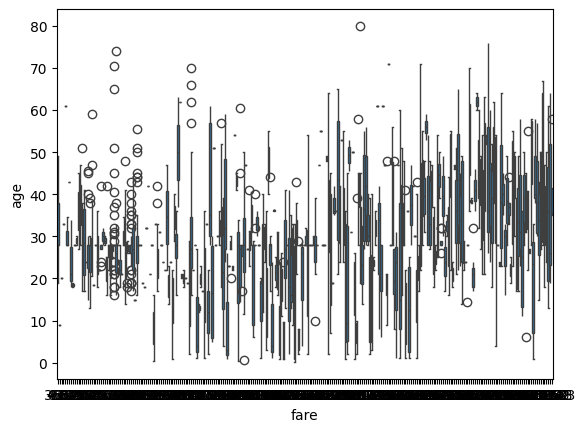

In [85]:
sns.boxplot(df,x='fare',y='age')

 get the co-relation for all numerical columns using heatmap


<Axes: >

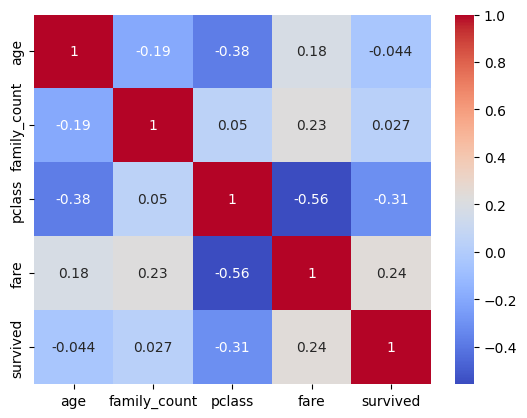

In [86]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

survival_rate of gender in each pclass
avg_age of gender in each pclass
avg_fare of gender in each pclass



survival_rate of gender in each age_category
survival_rate of companion_type in each age_category


In [87]:
survival_rate_gender_pclass = df.groupby(['pclass', 'gender'])['survived'].mean().reset_index()
print(survival_rate_gender_pclass)


   pclass  gender  survived
0       1  female  0.965278
1       1    male  0.340782
2       2  female  0.886792
3       2    male  0.146199
4       3  female  0.490741
5       3    male  0.152130


In [88]:
avg_age_gender_pclass = df.groupby(['pclass', 'gender'])['age'].mean().reset_index()
print(avg_age_gender_pclass)


   pclass  gender        age
0       1  female  36.347222
1       1    male  38.991173
2       2  female  27.513396
3       2    male  30.601345
4       3  female  23.908194
5       3    male  26.557465


In [89]:
avg_fare_gender_pclass = df.groupby(['pclass', 'gender'])['fare'].mean().reset_index()
print(avg_fare_gender_pclass)


   pclass  gender        fare
0       1  female  109.412500
1       1    male   69.888380
2       2  female   23.234811
3       2    male   19.905029
4       3  female   15.324398
5       3    male   12.419878


In [90]:
survival_rate_gender_agecat = df.groupby(['age_category', 'gender'])['survived'].mean().reset_index()
print(survival_rate_gender_agecat)


  age_category  gender  survived
0     children  female  0.660714
1     children    male  0.491525
2         teen  female  0.737705
3         teen    male  0.155340
4        adult  female  0.733096
5        adult    male  0.177536
6       senior  female  0.857143
7       senior    male  0.076923


C:\Users\balaj\AppData\Local\Temp\ipykernel_23892\1385586653.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_gender_agecat = df.groupby(['age_category', 'gender'])['survived'].mean().reset_index()


In [91]:
survival_rate_companion_agecat = df.groupby(['age_category', 'companion_type'])['survived'].mean().reset_index()
print(survival_rate_companion_agecat)


   age_category companion_type  survived
0      children         family  0.566038
1      children        friends  0.500000
2      children           solo  0.800000
3          teen         family  0.554545
4          teen        friends  0.321429
5          teen           solo  0.273684
6         adult         family  0.467354
7         adult        friends  0.510638
8         adult           solo  0.267857
9        senior         family  0.333333
10       senior        friends  1.000000
11       senior           solo  0.150000


C:\Users\balaj\AppData\Local\Temp\ipykernel_23892\2921074132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_companion_agecat = df.groupby(['age_category', 'companion_type'])['survived'].mean().reset_index()


In [74]:
df.columns

Index(['ticket', 'title', 'f_name', 'l_name', 'gender', 'age',
       'companion_type', 'family_count', 'pclass', 'embarked', 'fare',
       'survived', 'age_category'],
      dtype='object')

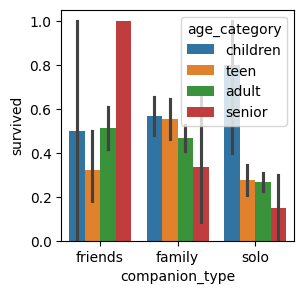

In [75]:
plt.figure(figsize=(3,3))
sns.barplot(df,x='companion_type',y='survived',hue='age_category')
plt.show()

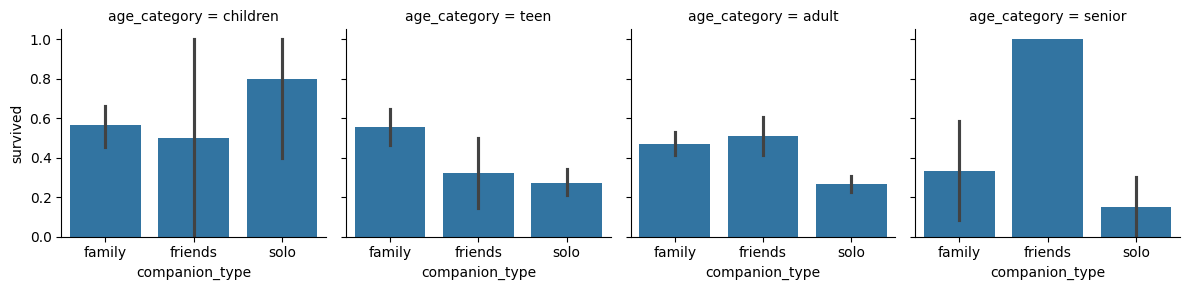

In [76]:
fg = sns.FacetGrid(df,col='age_category')
fg.map_dataframe(sns.barplot, x='companion_type',y= 'survived')


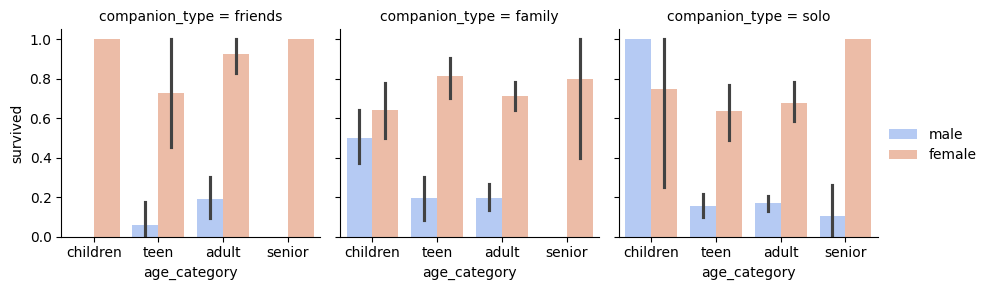

In [77]:
fg = sns.FacetGrid(df,col='companion_type')
fg.map_dataframe(sns.barplot, x='age_category',y= 'survived',hue='gender',palette='coolwarm',hue_order=['male','female'])
fg.add_legend()


plot pclass vice no of passengers

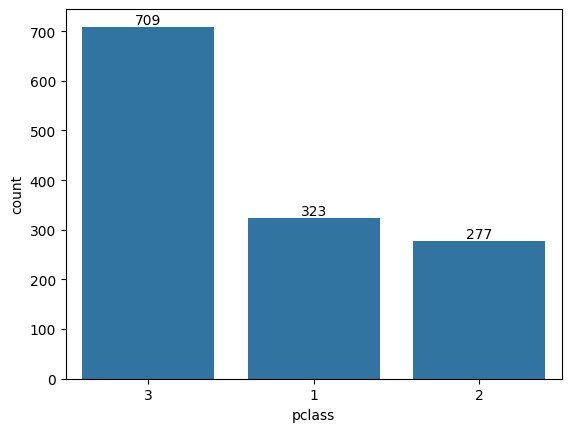

In [78]:
plt.Figure(figsize=(4,2))
c=sns.countplot(x=df['pclass'],order=df['pclass'].value_counts().index)
c.bar_label(c.containers[0])
plt.show()

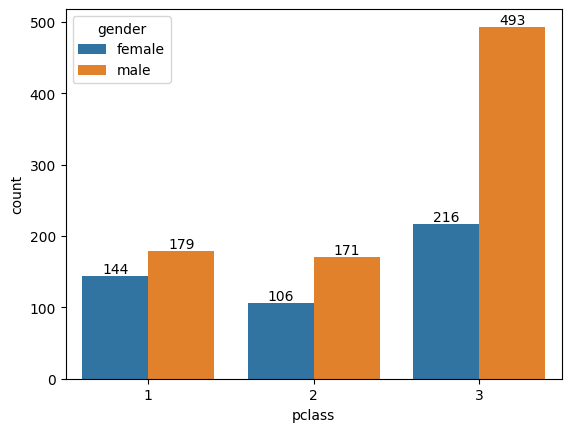

In [79]:
plt.Figure(figsize=(4,2))
c=sns.countplot(x=df['pclass'],hue=df['gender'])

for i  in c.containers:
    c.bar_label(i)